In [1]:
from ML_Train.DBQuerier import DBQuerier as Querier
import numpy as np
import ast
import pandas as pd
from crawlab_toolbox import plotting
from crawlab_toolbox.plotting import timedelta_helper
import datetime

In [2]:
querier = Querier('dbt1','IMS2_Bearing1')

In [3]:
assetId = 'IMS2_Bearing1'
featureTable = 'RMS'

In [7]:
def plot_features(assetId,featureTable,Y_label):
    
    query = """Select """ + featureTable + """.dateTime, """ + featureTable + """.values, assetId from dbt1.""" + featureTable + """
           where assetId = '""" + assetId + """' order by """ + featureTable + """.dateTime asc;"""
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values = np.array([[data[i][1] for i in range(len(data))]]).T
    
    dateTime = plotting.timedelta_helper(dateTime,'days')

    plotting.generate_plot(dateTime,values,
                             [''],'Time (Days)',Y_label,showplot=True,
                             template='wide',
                             save_plot=True,
                             transparent=True,
                             folder='Figures/IMS2_Timeseries',
                             filename=assetId.split('_')[1] + '_' + featureTable,
                             file_type='png')
    
def plot_all_features(assetId,featureTable,Y_label):
    
    query = """select * from
    (select
    dateTime,
    sum(Bearing4) as Bearing4,
    sum(Bearing3) as Bearing3,
    sum(Bearing2) as Bearing2,
    sum(Bearing1) as Bearing1
    
    from 
    (select
    dbt1.RMS.*,
    case when assetId = "IMS2_Bearing1" then dbt1.RMS.values end as Bearing1,
    case when assetId = "IMS2_Bearing2" then dbt1.RMS.values end as Bearing2,
    case when assetId = "IMS2_Bearing3" then dbt1.RMS.values end as Bearing3,
    case when assetId = "IMS2_Bearing4" then dbt1.RMS.values end as Bearing4
    from dbt1.RMS where assetId like '%IMS2%')as t  
    group by dateTime asc ) as v;"""
        
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values4 = np.array([[data[i][1] for i in range(len(data))]]).T
    values3 = np.array([[data[i][2] for i in range(len(data))]]).T
    values2 = np.array([[data[i][3] for i in range(len(data))]]).T
    values1 = np.array([[data[i][4] for i in range(len(data))]]).T
    
    rms_vals = np.hstack((values1,values2,values3,values4))
    
    dateTime = plotting.timedelta_helper(dateTime,'days')

    
    plotting.generate_plot(dateTime,rms_vals,
                             ['Bearing 1','Bearing 2','Bearing 3','Bearing 4'],'Time (Days)',Y_label,showplot=True,
                             template='wide',
                             save_plot=True,
                             transparent=True,
                             folder='Figures/IMS2_Timeseries',
                             filename='RMS_All_Bearings',
                             legend_loc='upper left',
                             file_type='png')
    

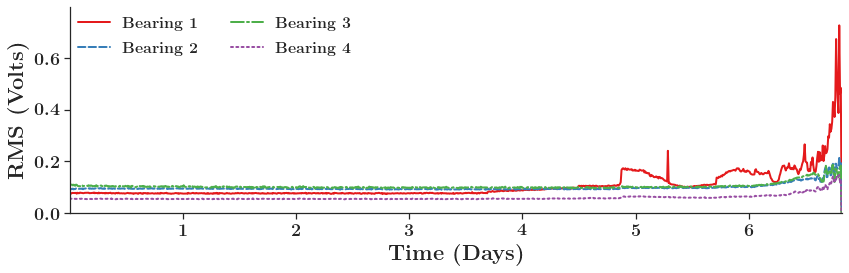

In [8]:
plot_all_features('IMS2_Bearing1','RMS','RMS (Volts)')

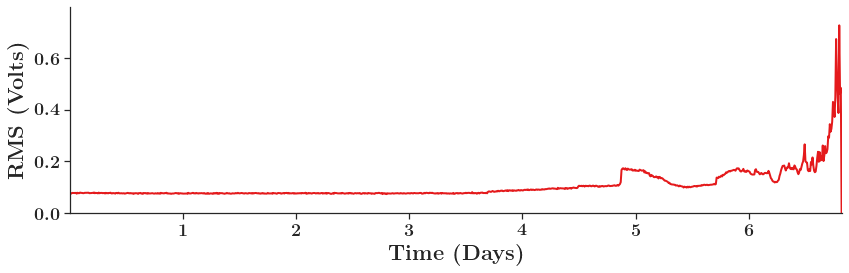

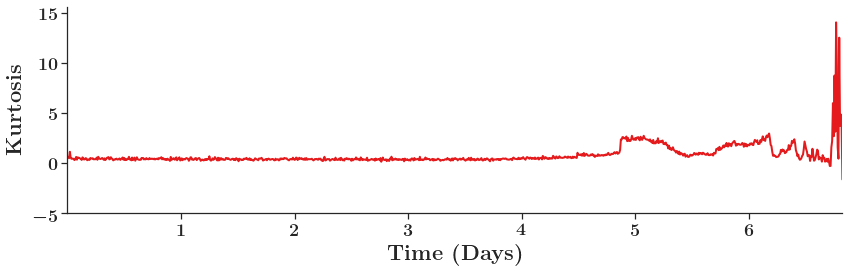

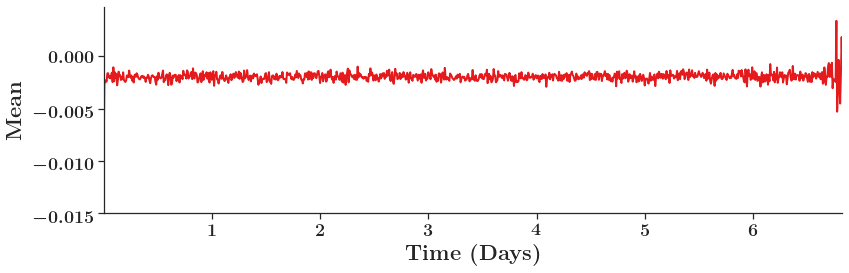

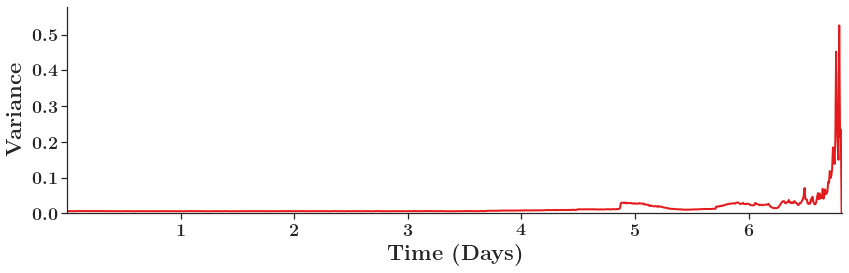

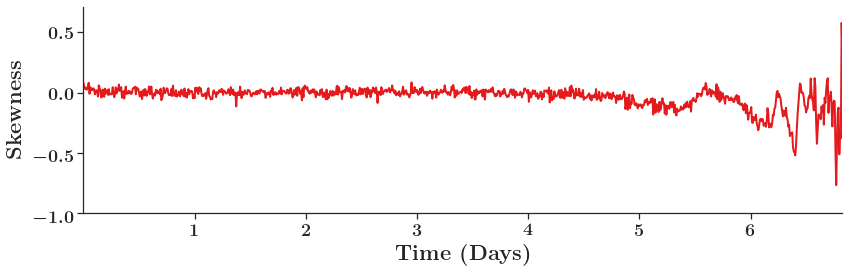

In [6]:
plot_features('IMS2_Bearing1','RMS','RMS (Volts)')

plot_features('IMS2_Bearing1','VibrationKurtosis','Kurtosis')

plot_features('IMS2_Bearing1','VibrationMean','Mean')

plot_features('IMS2_Bearing1','VibrationVariance','Variance')

plot_features('IMS2_Bearing1','VibrationSkewness','Skewness')


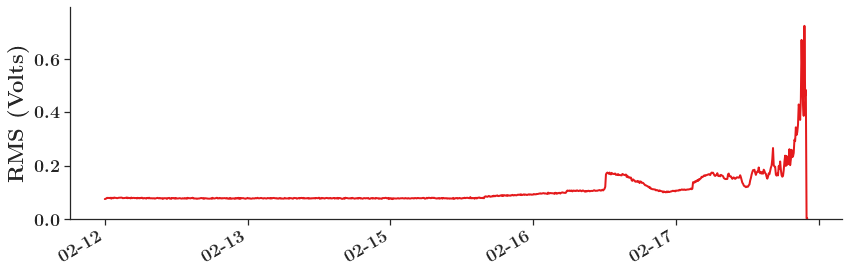

In [53]:
datetime.datetime.utcfromtimestamp(DF['dateTime'].values[.astype('O')/1e9)

TypeError: only size-1 arrays can be converted to Python scalars

In [61]:
DF['dateTime'].values[0]

numpy.datetime64('2004-02-17T17:22:39.000000000')

In [9]:
def get_features(assetId,featureTable,Y_label):
    
    query = """Select """ + featureTable + """.dateTime, """ + featureTable + """.values, assetId from dbt1.""" + featureTable + """
           where assetId = '""" + assetId + """' order by """ + featureTable + """.dateTime asc;"""
    
    cursor = querier.execute_query(query)
    data=cursor.fetchall()
    
    # dateTime = np.array([[data[i][0] for i in range(len(data))]]).T
    dateTime = np.array([data[i][0] for i in range(len(data))])
    values = np.array([[data[i][1] for i in range(len(data))]]).T

    return dateTime,values

In [20]:
dateTime,values = get_features('IMS2_Bearing1','RMS','RMS (Volts)')


In [21]:
def timedelta_helper(timeValues,timeUnit):
    
    timeValues = timeValues.flatten().tolist()
    startTime = timeValues[0]
    
    if timeUnit.lower() == 'minutes':
        timeDivisor = 60
    elif timeUnit.lower() == 'hours':
        timeDivisor = 60 * 60
    elif timeUnit.lower() == 'days':
        timeDivisor = 60 * 60 * 24
    elif timeUnit.lower() == 'weeks':
        timeDivisor = 60 * 60 * 24 * 7
    
    timeValues = [(timeValues[i] - startTime).total_seconds()/timeDivisor for i in range(len(timeValues))]
    
    timeValues = np.array(timeValues)
    
    return timeValues

In [22]:
timedelta_helper(dateTime,'hours')

array([  0.        ,   0.16666667,   0.33333333,   0.5       ,
         0.66666667,   0.83333333,   1.        ,   1.16666667,
         1.33333333,   1.5       ,   1.66666667,   1.83333333,
         2.        ,   2.16666667,   2.33333333,   2.5       ,
         2.66666667,   2.83333333,   3.        ,   3.16666667,
         3.33333333,   3.5       ,   3.66666667,   3.83333333,
         4.        ,   4.16666667,   4.33333333,   4.5       ,
         4.66666667,   4.83333333,   5.        ,   5.16666667,
         5.33333333,   5.5       ,   5.66666667,   5.83333333,
         6.        ,   6.16666667,   6.33333333,   6.5       ,
         6.66666667,   6.83333333,   7.        ,   7.16666667,
         7.33333333,   7.5       ,   7.66666667,   7.83333333,
         8.        ,   8.16666667,   8.33333333,   8.5       ,
         8.66666667,   8.83333333,   9.        ,   9.16666667,
         9.33333333,   9.5       ,   9.66666667,   9.83333333,
        10.        ,  10.16666667,  10.33333333,  10.5 

In [17]:
[(dateTime[i] - dateTime[0]).total_seconds() for i in range(len(dateTime))]

[0.0,
 600.0,
 1200.0,
 1800.0,
 2400.0,
 3000.0,
 3600.0,
 4200.0,
 4800.0,
 5400.0,
 6000.0,
 6600.0,
 7200.0,
 7800.0,
 8400.0,
 9000.0,
 9600.0,
 10200.0,
 10800.0,
 11400.0,
 12000.0,
 12600.0,
 13200.0,
 13800.0,
 14400.0,
 15000.0,
 15600.0,
 16200.0,
 16800.0,
 17400.0,
 18000.0,
 18600.0,
 19200.0,
 19800.0,
 20400.0,
 21000.0,
 21600.0,
 22200.0,
 22800.0,
 23400.0,
 24000.0,
 24600.0,
 25200.0,
 25800.0,
 26400.0,
 27000.0,
 27600.0,
 28200.0,
 28800.0,
 29400.0,
 30000.0,
 30600.0,
 31200.0,
 31800.0,
 32400.0,
 33000.0,
 33600.0,
 34200.0,
 34800.0,
 35400.0,
 36000.0,
 36600.0,
 37200.0,
 37800.0,
 38400.0,
 39000.0,
 39600.0,
 40200.0,
 40800.0,
 41400.0,
 42000.0,
 42600.0,
 43200.0,
 43800.0,
 44400.0,
 45000.0,
 45600.0,
 46200.0,
 46800.0,
 47400.0,
 48000.0,
 48600.0,
 49200.0,
 49800.0,
 50400.0,
 51000.0,
 51600.0,
 52200.0,
 52800.0,
 53400.0,
 54000.0,
 54600.0,
 55200.0,
 55800.0,
 56400.0,
 57000.0,
 57600.0,
 58200.0,
 58800.0,
 59400.0,
 60000.0,
 60600.0,
 